# Exploratory Data Analysis

In [99]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [100]:
# Load data
ames_clean = pd.read_csv('data/Ames_Housing_Price_Data_clean.csv')

In [101]:
# Show columns
print(ames_clean.columns)

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       

In [102]:
# Show shape
ames_clean.shape

(2576, 71)

In [103]:
# Set features and target
predictors = ames_clean.drop(columns=['SalePrice'])
target = ames_clean['SalePrice']

## Target Exploration

Text(0, 0.5, 'Count')

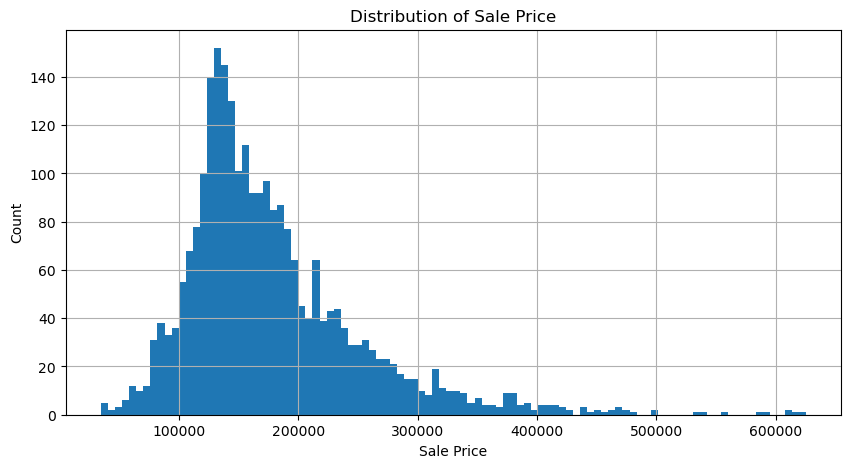

In [104]:
# Graph the distribution of the target variable
target.hist(bins=100, figsize=(10,5))

# Label title and axes
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Count')

In [105]:
# Print the mean, median, max, and min of the target variable
print('Mean: ', target.mean())
print('Median: ', target.median())
print('Max: ', target.max())
print('Min: ', target.min())

Mean:  177891.02833850932
Median:  159900.0
Max:  625000
Min:  34900


<AxesSubplot:>

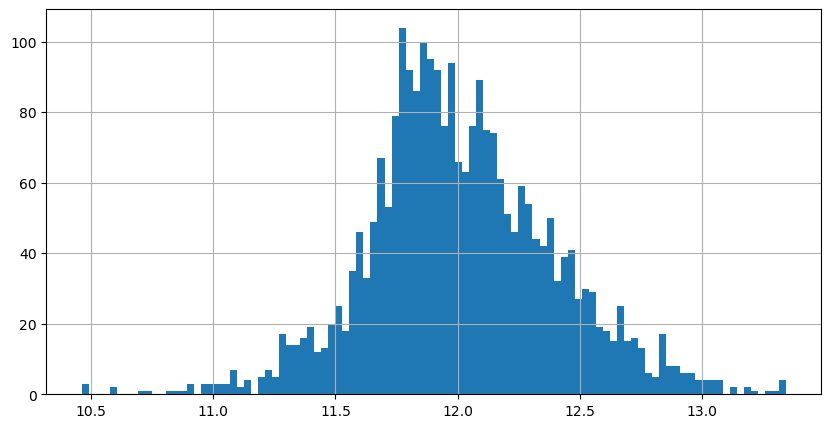

In [106]:
# Plot the log of the target variable
log_target = np.log(target)
log_target.hist(bins=100, figsize=(10,5))

## Intuition and Conventional Wisdom on Features

Conventional wisdom identifies several key features important in determining a home's value:

1. Location
2. Home size and usable space
3. Age and condition
4. Upgrades and updates
5. The local market
6. Economic indicators
7. Interest rates

See:  https://www.opendoor.com/articles/factors-that-influence-home-value

Let's examine if this is true.

In [107]:
# Create linear regression object
lr = LinearRegression()

#### Neighborhood : Physical locations within Ames city limits

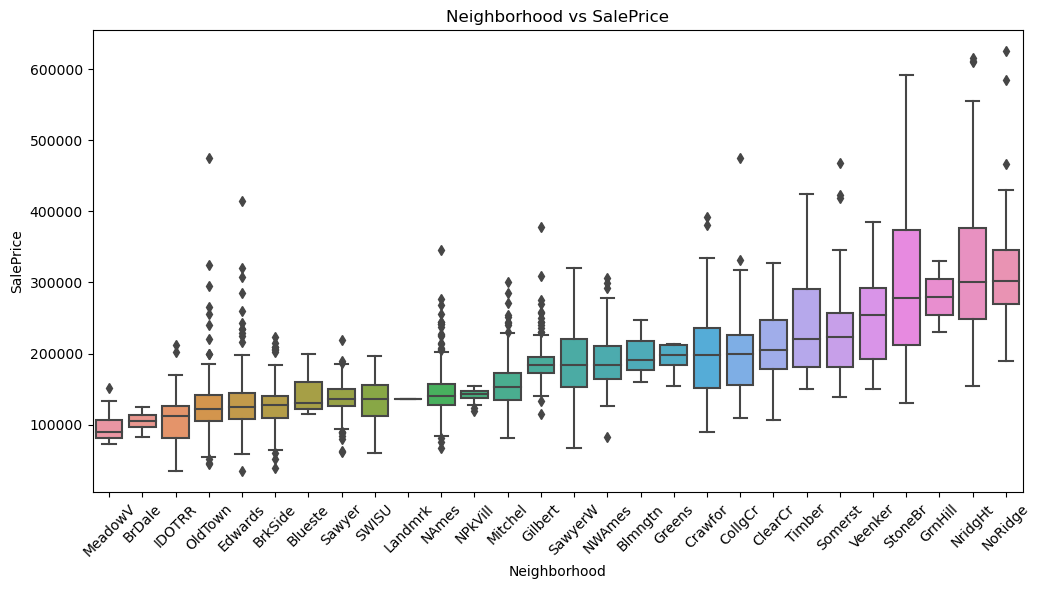

In [120]:
# Calculate median SalePrice for each Neighborhood
median_order = ames_clean.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=True).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Condition1 : Proximity to various conditions

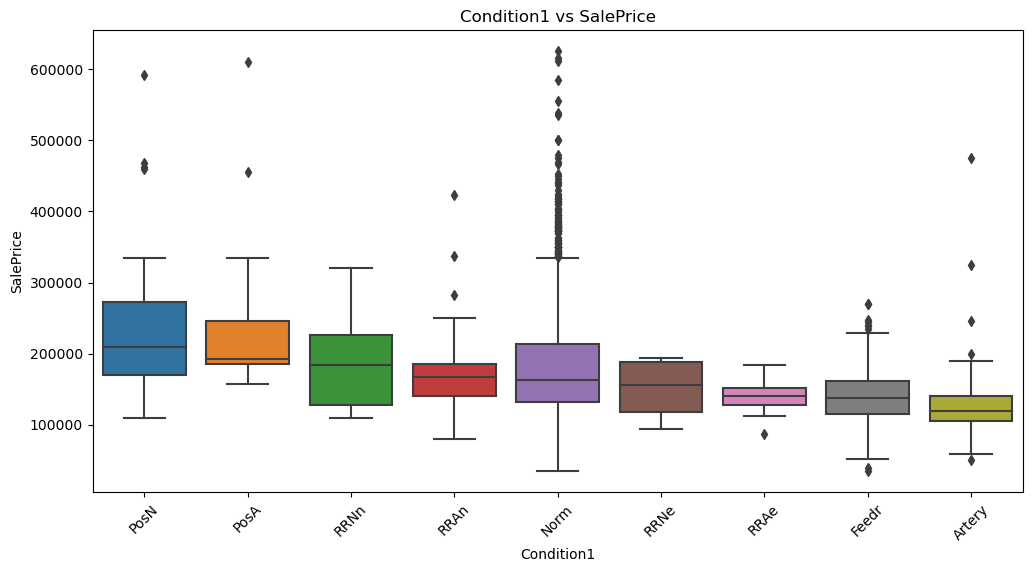

In [108]:
# Calculate median SalePrice for Condition1
median_order = ames_clean.groupby(['Condition1'])['SalePrice'].median().sort_values(ascending=False).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition1', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Condition1 vs SalePrice')
plt.xlabel('Condition1')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### LotArea : Lot size in square feet

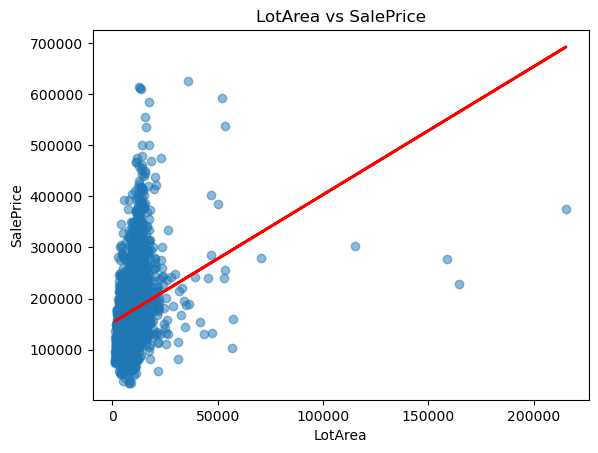

target R^2 = 0.07524216096405001


In [109]:
# Plot and score LotArea

# Fit the model
lr.fit(predictors[['LotArea']], target)

# Create scatter plot
plt.scatter(predictors['LotArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['LotArea'], lr.predict(predictors[['LotArea']]), color='red', linewidth=2)

# Label the plot
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"target R^2 = {lr.score(predictors[['LotArea']], target)}")

#### GrLivArea : Above grade (ground) living area square feet

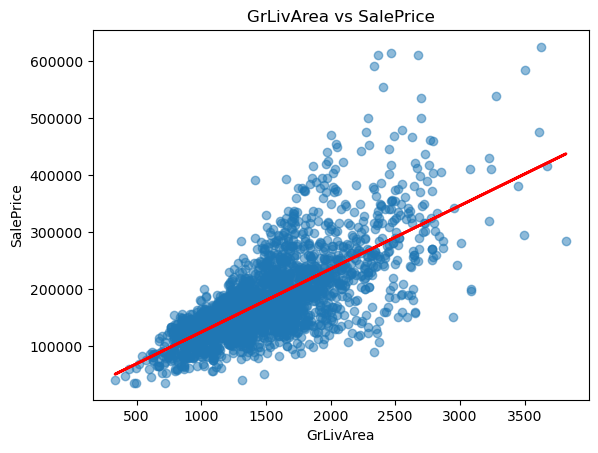

R^2 = 0.5201163079725513


In [110]:
# Plot and score GrLivArea

# Fit the model
lr.fit(predictors[['GrLivArea']], target)

# Create scatter plot
plt.scatter(predictors['GrLivArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['GrLivArea'], lr.predict(predictors[['GrLivArea']]), color='red', linewidth=2)

# Label the plot
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['GrLivArea']], target)}")

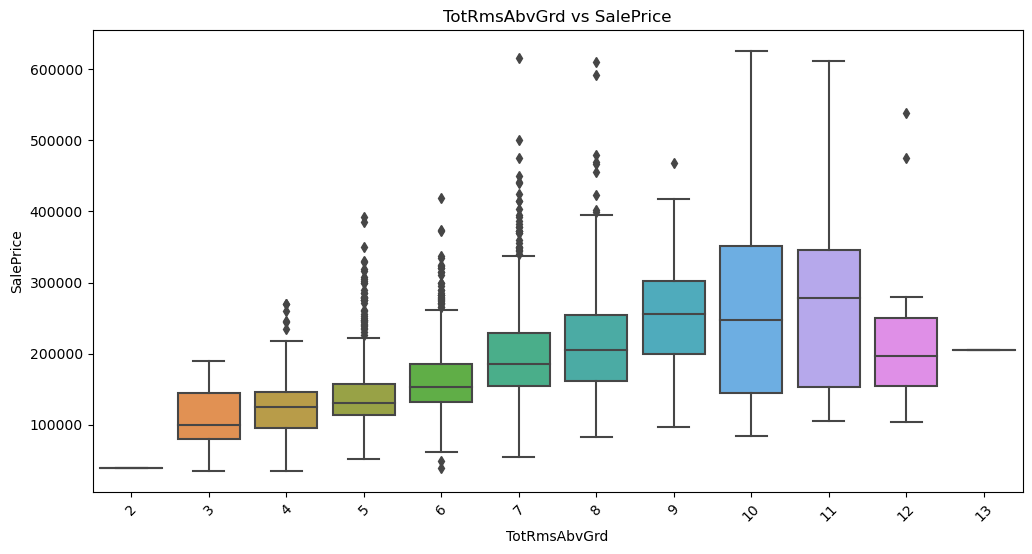

In [88]:
# Create a box plot of SalePrice vs. TotRmsAbvGrd
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [111]:
# Fit the model
lr.fit(predictors[['TotRmsAbvGrd']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['TotRmsAbvGrd']], target)}")

R^2 = 0.23997418412842875


#### YearBuilt: Original construction date

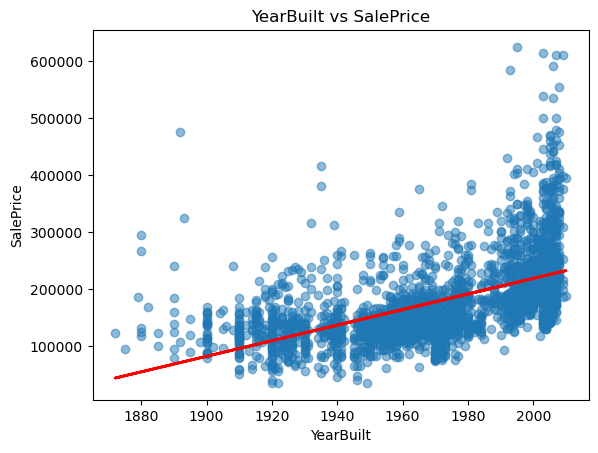

R^2 = 0.3004426773305948


In [112]:
# Plot and score YearBuilt

# Fit the model
lr.fit(predictors[['YearBuilt']], target)

# Create scatter plot
plt.scatter(predictors['YearBuilt'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearBuilt'], lr.predict(predictors[['YearBuilt']]), color='red', linewidth=2)

# Label the plot
plt.title('YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearBuilt']], target)}")

#### YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)

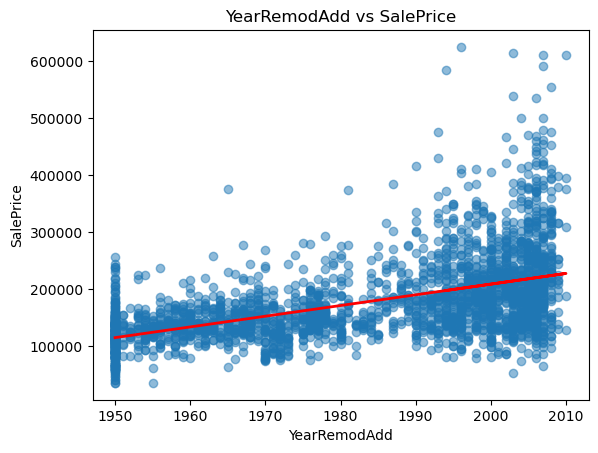

R^2 = 0.26953198273523493


In [113]:
# Plot and score YearRemodAdd

# Fit the model
lr.fit(predictors[['YearRemodAdd']], target)

# Create scatter plot
plt.scatter(predictors['YearRemodAdd'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearRemodAdd'], lr.predict(predictors[['YearRemodAdd']]), color='red', linewidth=2)

# Label the plot
plt.title('YearRemodAdd vs SalePrice')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearRemodAdd']], target)}")

#### OverallQual : Rates the overall material and finish of the house

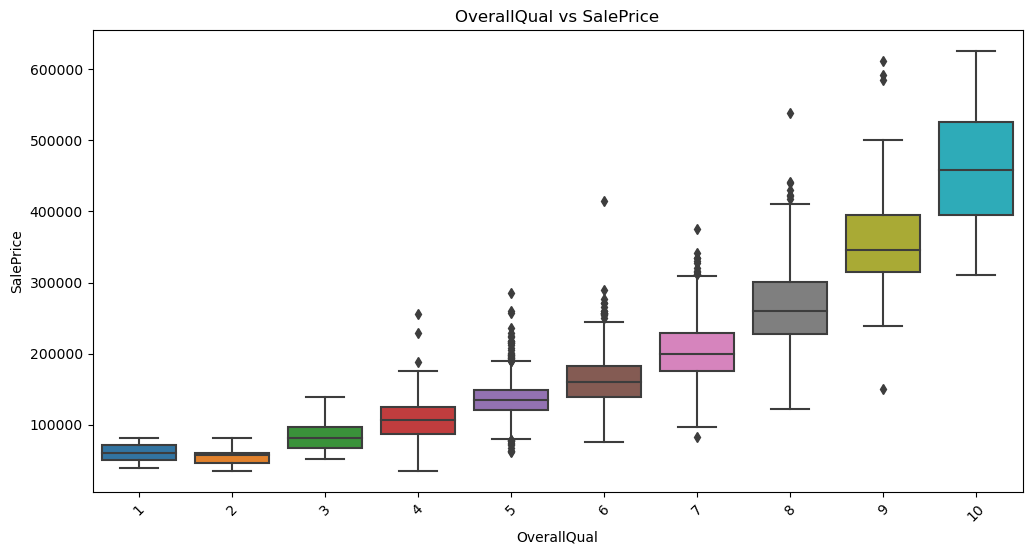

In [114]:
# Create a box plot of SalePrice vs. OverallQual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [93]:
# Fit the model
lr.fit(predictors[['OverallQual']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallQual']], target)}")

R^2 = 0.6291558560384246


#### OverallCond : Rates the overall condition of the house

In [115]:
# Fit the model
lr.fit(predictors[['OverallCond']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallCond']], target)}")

R^2 = 0.01132490245038087


## Systematic Feature Analysis

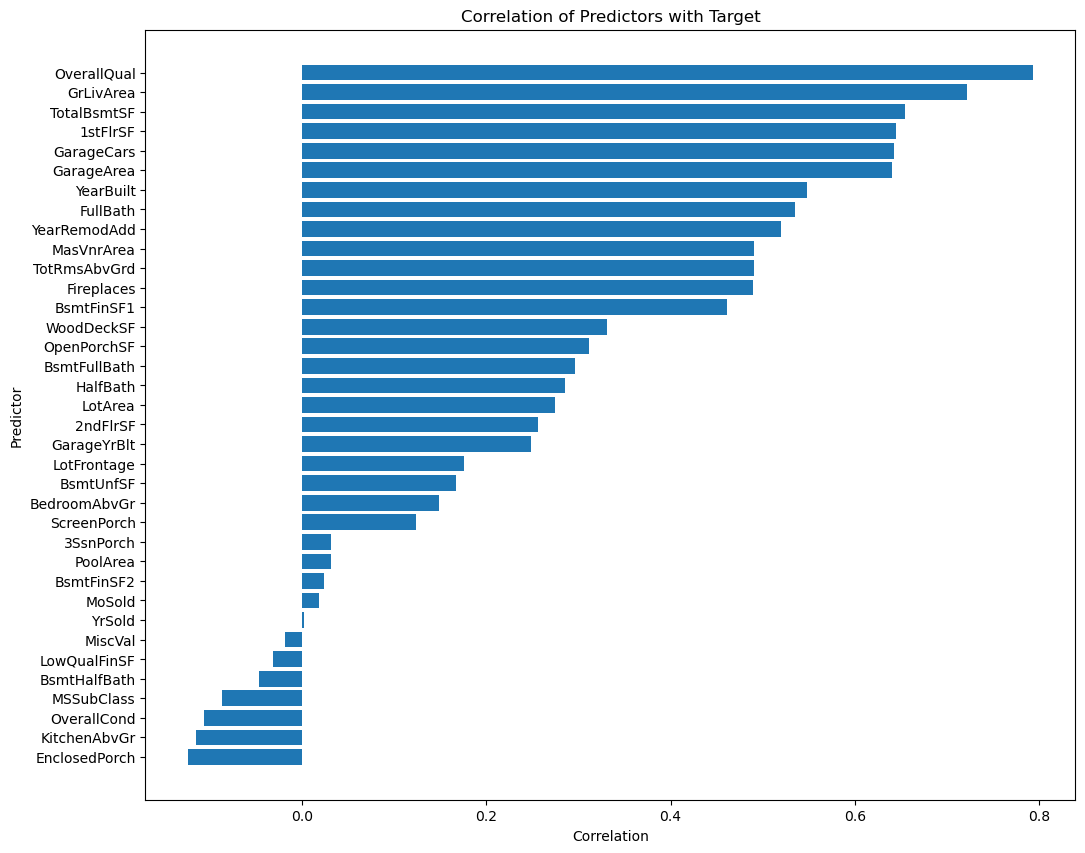

In [116]:
# Calculate correlations
correlations = predictors.corrwith(target).sort_values(ascending=True)

# Plot a horizontal bar plot
plt.figure(figsize=(12, 10))
plt.barh(y=correlations.index, width=correlations)

# Label the plot
plt.title('Correlation of Predictors with Target')
plt.xlabel('Correlation')
plt.ylabel('Predictor')

# Show the plot
plt.show()


In [117]:
# Create a list of all numeric predictors
numeric_cols = ames_clean.select_dtypes(include=[np.number]).columns

# Drop SalePrice from the list
numeric_cols = numeric_cols.drop('SalePrice')

# Print columns
print(numeric_cols)

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


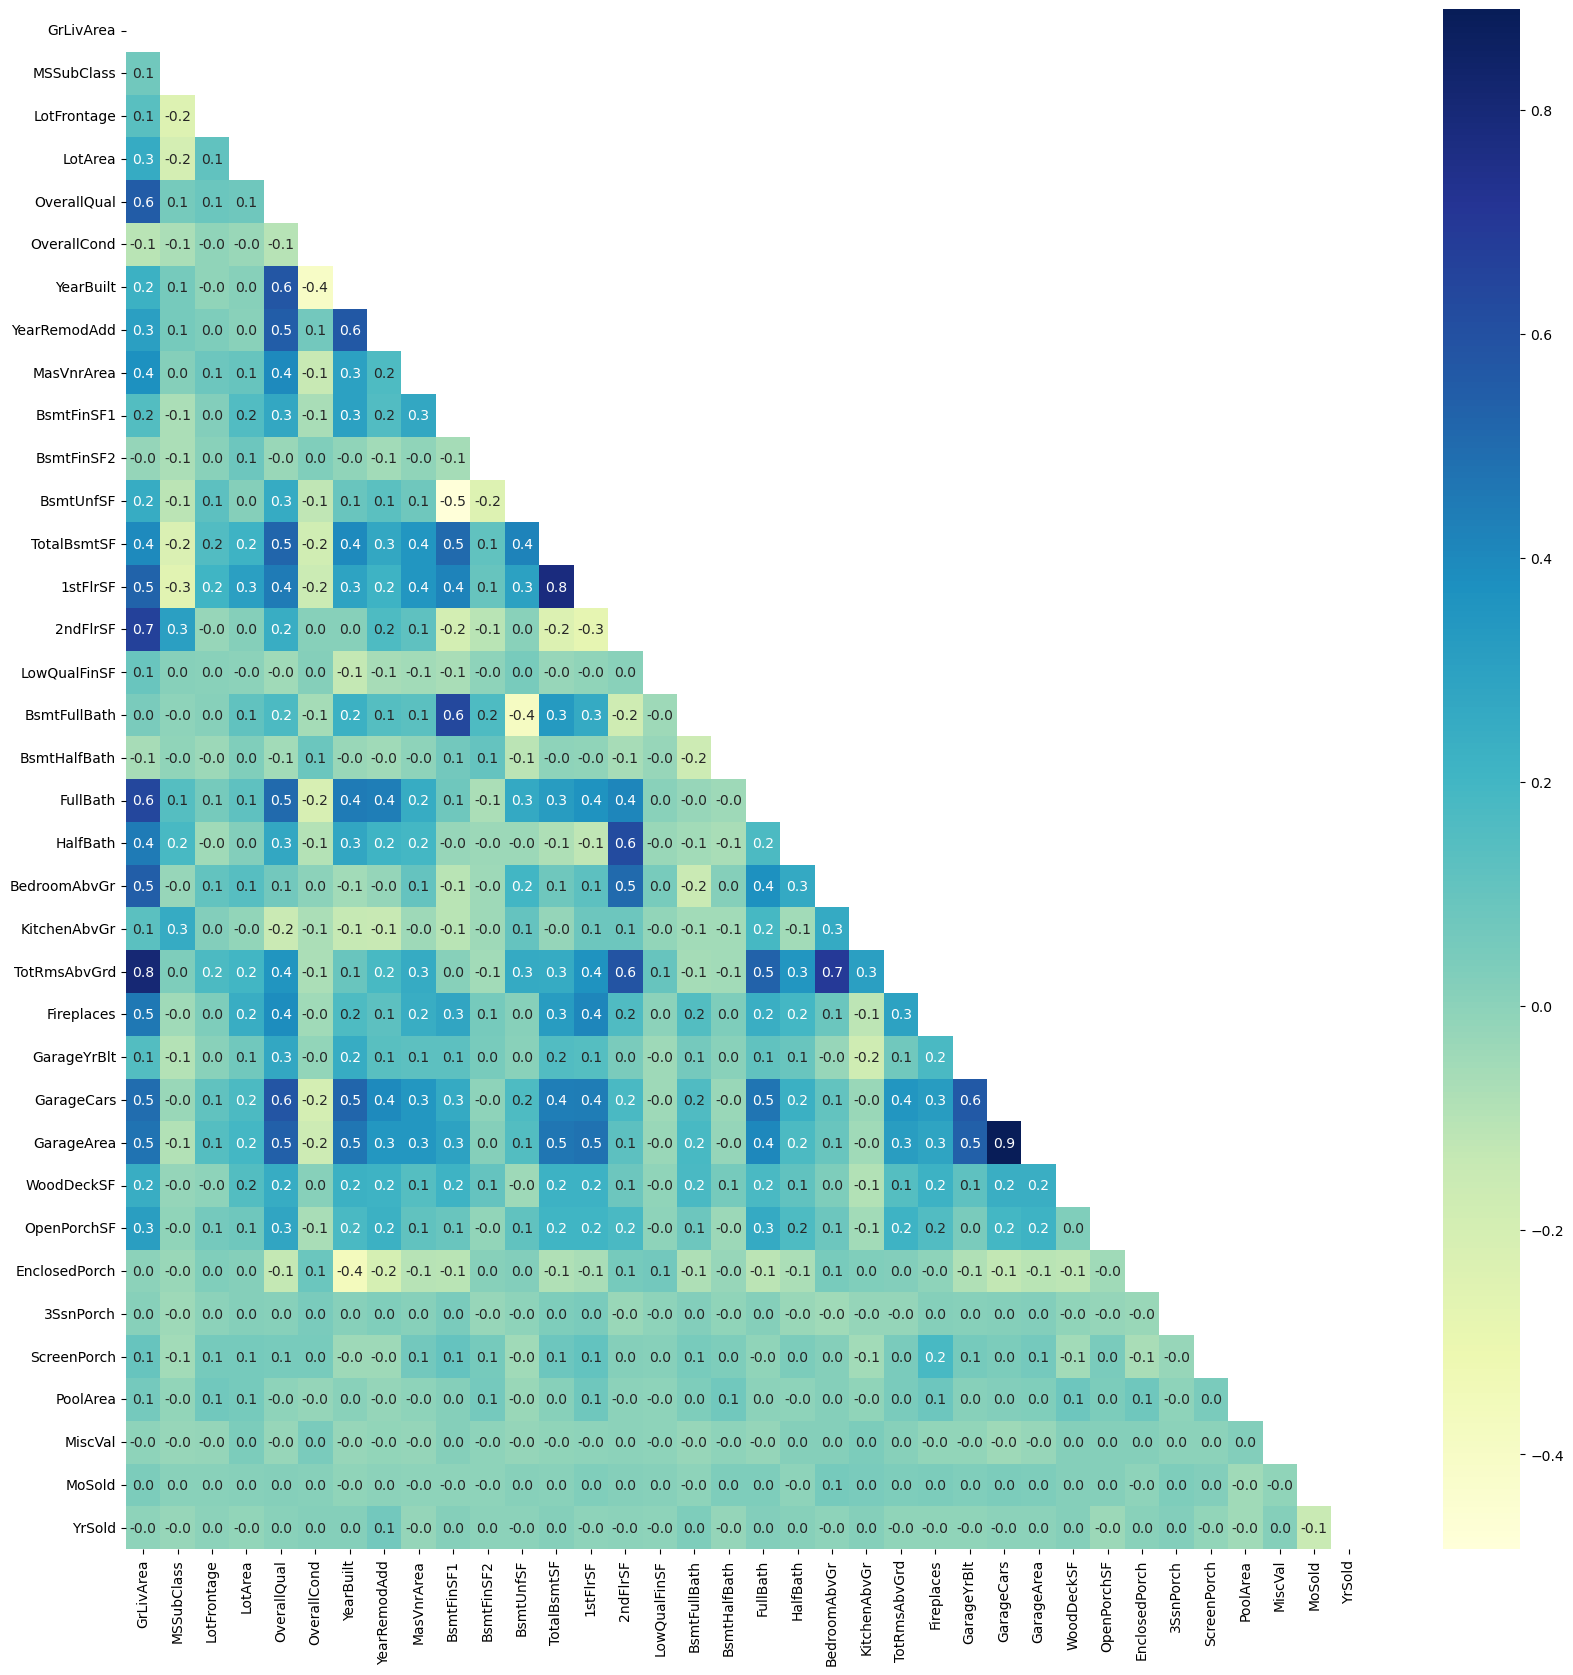

In [118]:
# Plot the correlation matrix
correlation_matrix = ames_clean[numeric_cols].corr()

# Create a mask to hide upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the figure
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1f', cmap='YlGnBu')

# Show the plot
plt.show()


In [119]:
# Calculate the variance inflation factor (VIF) for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(ames_clean[numeric_cols].values, i) 
              for i in range(ames_clean[numeric_cols].shape[1])]

# Print the column names and their VIF values
vif = vif.assign(Feature=ames_clean[numeric_cols].columns)
vif.sort_values(by='VIF', ascending=False, inplace=True)
print(vif)

             VIF        Feature
0            inf      GrLivArea
9            inf     BsmtFinSF1
15           inf   LowQualFinSF
14           inf       2ndFlrSF
13           inf       1stFlrSF
12           inf    TotalBsmtSF
11           inf      BsmtUnfSF
10           inf     BsmtFinSF2
35  2.185142e+04         YrSold
7   2.055372e+04   YearRemodAdd
6   1.607437e+04      YearBuilt
22  8.220637e+01   TotRmsAbvGrd
4   6.178226e+01    OverallQual
21  4.353223e+01   KitchenAbvGr
5   4.154092e+01    OverallCond
25  4.072272e+01     GarageCars
24  3.372097e+01    GarageYrBlt
26  3.275401e+01     GarageArea
20  3.162723e+01   BedroomAbvGr
18  2.510831e+01       FullBath
34  6.424743e+00         MoSold
2   4.381062e+00    LotFrontage
1   4.242252e+00     MSSubClass
16  3.630140e+00   BsmtFullBath
19  3.453788e+00       HalfBath
3   3.107347e+00        LotArea
23  2.944945e+00     Fireplaces
27  1.898857e+00     WoodDeckSF
8   1.789340e+00     MasVnrArea
28  1.770212e+00    OpenPorchSF
29  1.37

/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
